In [19]:
# Setting file path
import os # Import the os module for file path handling

# Define the directory where your CSV files are located
data_directory = 'C:/Users/HP/Downloads/Machine-Learning-for-Paper-main/Machine-Learning-for-Paper-main/ml_data/' ## Remember to Change the path directory with your path 

In [20]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sm
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.spatial import ConvexHull
from matplotlib.patches import Polygon
from matplotlib.colors import ListedColormap
import matplotlib.colors as mcolors
from matplotlib.colors import Normalize
import matplotlib as mpl
from matplotlib.lines import Line2D
from matplotlib.cm import ScalarMappable

In [25]:
# Load data from CSV files
file_names = ['saltbridge-tbcol.csv', 'saltbridge-tb2rr.csv', 'saltbridge-tbnzo.csv', 'saltbridge-tb6nl.csv','saltbridge-tbapo.csv' ]

# Create a list of file paths by joining the directory path and file names
files = [os.path.join(data_directory, file_name) for file_name in file_names]

# Load data from all files into a list of DataFrames
data_frames = [pd.read_csv(file) for file in files]

# Ensure all DataFrames have the same columns
common_columns = set(data_frames[0].columns)
for df in data_frames[1:]:
    common_columns &= set(df.columns)

# Add missing columns with zeros
for i, df in enumerate(data_frames):
    missing_columns = list(common_columns - set(df.columns))
    for column in missing_columns:
        df[column] = 0  # Fill missing columns with zeros
              

# Concatenate the aligned DataFrames
aligned_features = pd.concat(data_frames, axis=0)

# Replace NaN values with zeros
aligned_features.fillna(-1, inplace=True)  


# Print the aligned features DataFrame
print(aligned_features)# Concatenate the aligned DataFrames


# Save the aligned features DataFrame to a CSV file
output_file = os.path.join(data_directory, 'aligned_features.csv')
aligned_features.to_csv(output_file, index=False)

print(f"Aligned features saved to '{output_file}'")

      saltbr-ASP116-ARG156   saltbr-ASP120-ARG121   saltbr-ASP120-ARG123   \
0                      5.61                   6.69                   9.28   
1                      4.48                   6.28                   9.76   
2                      4.38                   6.52                   9.92   
3                      4.01                   7.01                   8.57   
4                      6.07                   6.32                  10.00   
...                     ...                    ...                    ...   
1515                   4.17                   4.72                  10.81   
1516                   4.14                   5.00                  10.85   
1517                   8.50                   4.79                  10.65   
1518                   7.39                   4.63                  10.69   
1519                   4.06                   4.97                  10.10   

      saltbr-ASP120-LYS124   saltbr-ASP127-ARG123   saltbr-ASP127-LYS124   

Accuracy: 1.00
Score: 1.00
[[ 738    0    0    0    0]
 [   0 1117    0    0    0]
 [   0    0 1116    0    0]
 [   0    0    0 1136    0]
 [   0    0    0    0 1183]]


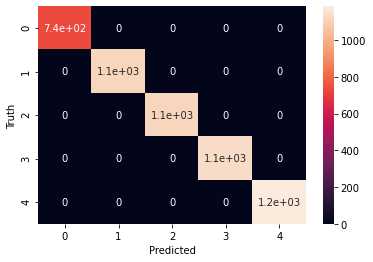

In [30]:
# Define the data file name (without the path)
data_file_name = 'aligned_features.csv'
# Combine the directory path and file name to create the full file path
csv_file_path = os.path.join(data_directory, data_file_name)
# Load data from the specified CSV file
data = pd.read_csv(csv_file_path)

# Extract features (all columns except the label column)
X = data.drop(columns=['label'])  # Replace 'label' with your label column name

# Extract the label column
y = data['label']  # Replace 'label' with your label column name

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Create a Random Forest Classifier model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict labels on the testing data
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

score = model.score(X_test, y_test)
print(f"Score: {score:.2f}")

# Confusion matrix and heatmap
cm = confusion_matrix(y_test, y_pred)
print(cm)

sm.heatmap(cm, annot=True)
plt.ylabel("Truth")
plt.xlabel("Predicted")

# Display the plot
plt.show()

{'saltbr-ASP116-ARG156 ': 0.0, 'saltbr-ASP120-ARG121 ': 0.0, 'saltbr-ASP120-ARG123 ': 0.0, 'saltbr-ASP120-LYS124 ': 0.0, 'saltbr-ASP127-ARG123 ': 0.0, 'saltbr-ASP127-LYS124 ': 0.0, 'saltbr-ASP160-ARG123 ': 0.0, 'saltbr-ASP160-ARG156 ': 0.0, 'saltbr-ASP199-LYS163 ': 0.0, 'saltbr-ASP199-LYS166 ': 0.0004274384220648775, 'saltbr-ASP205-ARG390 ': 0.020099566223444637, 'saltbr-ASP205-LYS304 ': 0.0, 'saltbr-ASP211-ARG214 ': 0.0, 'saltbr-ASP211-ARG215 ': 0.0, 'saltbr-ASP211-LYS304 ': 0.0, 'saltbr-ASP218-ARG214 ': 0.0, 'saltbr-ASP218-LYS280 ': 0.0, 'saltbr-ASP251-ARG2 ': 0.013050816340857928, 'saltbr-ASP306-ARG308 ': 0.0, 'saltbr-ASP322-ARG373 ': 0.0, 'saltbr-ASP327-ARG373 ': 0.0, 'saltbr-ASP327-LYS326 ': 0.0, 'saltbr-ASP33-ARG84 ': 0.0, 'saltbr-ASP33-LYS60 ': 0.0, 'saltbr-ASP345-LYS311 ': 0.0, 'saltbr-ASP367-ARG229 ': 0.010125829924411672, 'saltbr-ASP392-ARG422 ': 0.0, 'saltbr-ASP396-ARG422 ': 2.5194309053138607e-05, 'saltbr-ASP39-LYS40 ': 0.0, 'saltbr-ASP424-ARG264 ': 0.0, 'saltbr-ASP431-ARG2

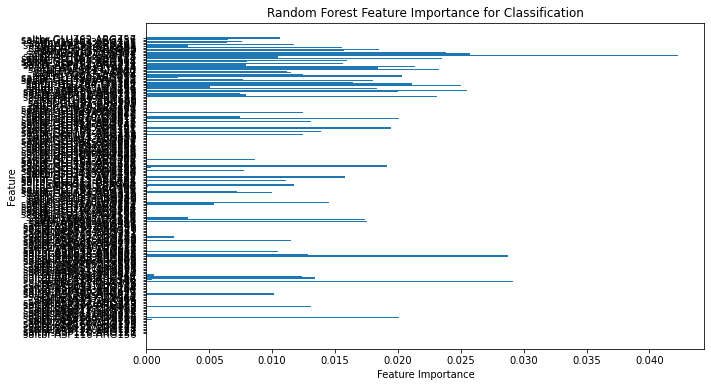

In [31]:
# Create a Random Forest Classifier model for feature importance
model2 = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the entire data for feature importance extraction
model2.fit(X, y)

# Get feature importances
feature_importances = model2.feature_importances_

# Create a dictionary of feature importances
feature_importance_dict = dict(zip(X.columns, feature_importances))

# Define the file path for saving the feature importances file
output_file_path = os.path.join(data_directory, 'feature_importances.txt')

# Save feature importances to the specified file
with open(output_file_path, 'w') as f:
    for feature, importance in feature_importance_dict.items():
        f.write(f"{feature}: {importance:.4f}\n")

# Display or plot feature importances as needed
print(feature_importance_dict)

plt.figure(figsize=(10, 6))
plt.barh(range(len(X.columns)), feature_importances, align="center")
plt.yticks(range(len(X.columns)), X.columns)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Random Forest Feature Importance for Classification")
plt.show()

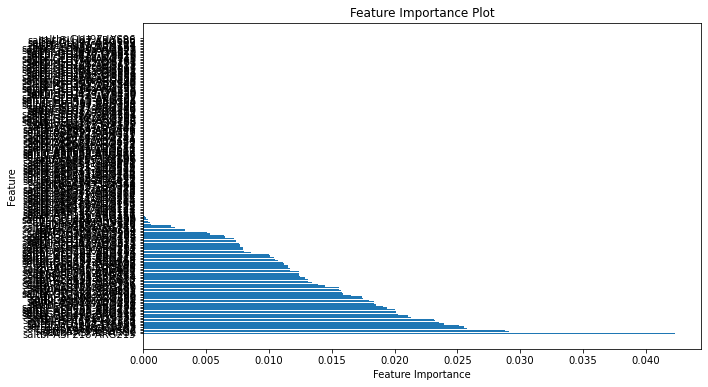

In [32]:
import matplotlib.pyplot as plt
import os

# Define the feature importances filename
feature_importances_filename = 'feature_importances.txt'

# Build the full file path by combining the directory and filename
feature_importances_file_path = os.path.join(data_directory, feature_importances_filename)

# Load feature importances from the saved text file
feature_importances = {}

with open(feature_importances_file_path, 'r') as f:
    for line in f:
        feature, importance = line.strip().split(':')
        feature_importances[feature.strip()] = float(importance)

# Sort feature importances in descending order
sorted_importances = sorted(feature_importances.items(), key=lambda x: x[1], reverse=True)

# Extract feature names and importances for plotting
features = [feature for feature, importance in sorted_importances]
importances = [importance for feature, importance in sorted_importances]

# Create a bar plot for feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(len(features)), importances, align="center")
plt.yticks(range(len(features)), features)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance Plot")
plt.show()

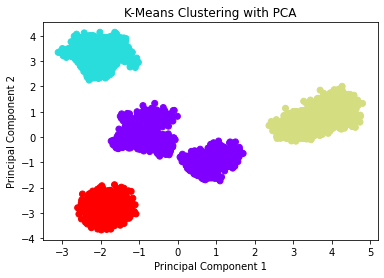

In [33]:
# Train again the Random Forest model with the entire training+testing data to get feature importances
#model2 = RandomForestClassifier(n_estimators=100, random_state=42)
#model2.fit(X, y)
feature_importances = model2.feature_importances_
# Choose a threshold or a fixed number of top features
important_features = X.columns[feature_importances > 0.02] #alterations can be done for feature selection
                                                           #for PCA according to importances
#print (important_features[0])

# Select important features
X_important = X[important_features]
#print (X_important)


# Convert data to a NumPy array if it's a pandas DataFrame
X_array = X_important.values

# Scale the data using StandardScaler before applying PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_array)

# Apply PCA for dimensionality reduction
# Apply PCA to the scaled data
pca = PCA(n_components=2) #Keeping the first two PCs PC1 & PC2
X_reduced = pca.fit_transform(X_scaled)

# Apply K-Means clustering
n_clusters = 4  # You can choose the number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(X_reduced)

#For checking if currect label is mapped
#for i in range(len(cluster_labels)):
#    print(X_reduced[i, 0], X_reduced[i, 1], cluster_labels[i])

# Visualize the clusters
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=cluster_labels, cmap='rainbow')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')


plt.title('K-Means Clustering with PCA')
plt.show()

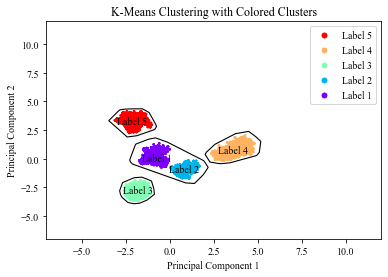

In [34]:
# Set the font to Times New Roman
mpl.rcParams['font.family'] = 'Times New Roman'

#from matplotlib.patches import Polygon
unique_labels = y.unique()

#For checking if currect label is mapped 
#for i in range(len(y)):
#    print(X_reduced[i, 0], X_reduced[i, 1], y[i])
        
# Set the same scale for both axes
min_val = min(X_reduced.min(axis=0))
max_val = max(X_reduced.max(axis=0))
plt.xlim(-7, 12)
plt.ylim(-7, 12)

# Create a discrete colormap
for label_value in y.unique():
    scatter=plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap='rainbow', s=2)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering with Colored Clusters')
# Create custom legend with label values and colors
legend_labels = [f'Label {label_value}' for label_value in unique_labels]
legend_handles = [Line2D([0], [0], marker='o', color='w', markerfacecolor=scatter.cmap(scatter.norm(label_value)), markersize=7) for label_value in unique_labels]
plt.legend(handles=legend_handles, labels=legend_labels, loc='best')


# Define the scatter plot image file name
scatter_plot_filename = 'scatter_plot_with_clusters.png'


# Scatter plot with colored labels 

for label_value in unique_labels:
    cluster_center = X_reduced[y == label_value].mean(axis=0)
    plt.annotate(f'Label {label_value}', cluster_center, textcoords="offset points", xytext=(0, -2), ha='center')


for cluster_id in range(n_clusters):
    cluster_points = X_reduced[cluster_labels == cluster_id]
    hull = ConvexHull(cluster_points)
    expansion_factor = 0.3 # Adjust this factor to control the expansion
    hull_center = np.mean(cluster_points[hull.vertices], axis=0)
    expanded_vertices = cluster_points[hull.vertices] + (cluster_points[hull.vertices] - hull_center) * expansion_factor
    polygon = Polygon(expanded_vertices, fill=False, edgecolor='black', linewidth=1.1, alpha=1)  # Adjust alpha here
    plt.gca().add_patch(polygon)

# Save the scatter plot with clusters
if scatter_plot_filename:
    scatter_plot_file_path = os.path.join(data_directory, scatter_plot_filename)
    plt.savefig(scatter_plot_file_path, dpi=400)

# Show the scatter plot
plt.show()
